
# Análisis de tornados

Este es un código de prueba de acceso libre obtenido de Tropycal, y que muestra como recuperar y analizar la base de datos de tornados del Centro de Predicción de Tormentas (SPC) desde 1950 hasta el presente usando los módulos especiales para tornados .tracks y .tornado. Además, se usará la libreria datetime como apoyo para establecer marcas de tiempo y crear gráficas más completas.
Para poder ejecutar la librería tuve que instalar previamente las librerias de cartopy (para poder procesar los datos geográficos y crear los mapas) y shapely (para porcesar los datos de vectores).

In [1]:
import tropycal.tracks as tracks
import tropycal.tornado as tornado
import datetime as dt

## Usando la base de datos de tornados con TornadoDataset
Este comando nos permite obtener la base de datos de tornados directamente de la página de Tropycal.



In [2]:
tor_data = tornado.TornadoDataset()

--> Starting to read in tornado track data
--> Completed reading in tornado data for 1950-2022 (6.49 seconds)


La base de datos de tornados nos sirve para analizar tanto tornados asociados con ciclones tropicales como los que no lo están. 

/home/emiliano_lima/anaconda3/lib/python3.9/site-packages/tropycal/tornado/tools.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTors['SPC_time'] = dfTors['UTC_time'] - timedelta(hours=12)


<GeoAxesSubplot:title={'left':'Tornado tracks and daily PPH (%)','right':'Start ... 12:02 UTC 27 Apr 2011\nEnd ... 11:50 UTC 28 Apr 2011'}>

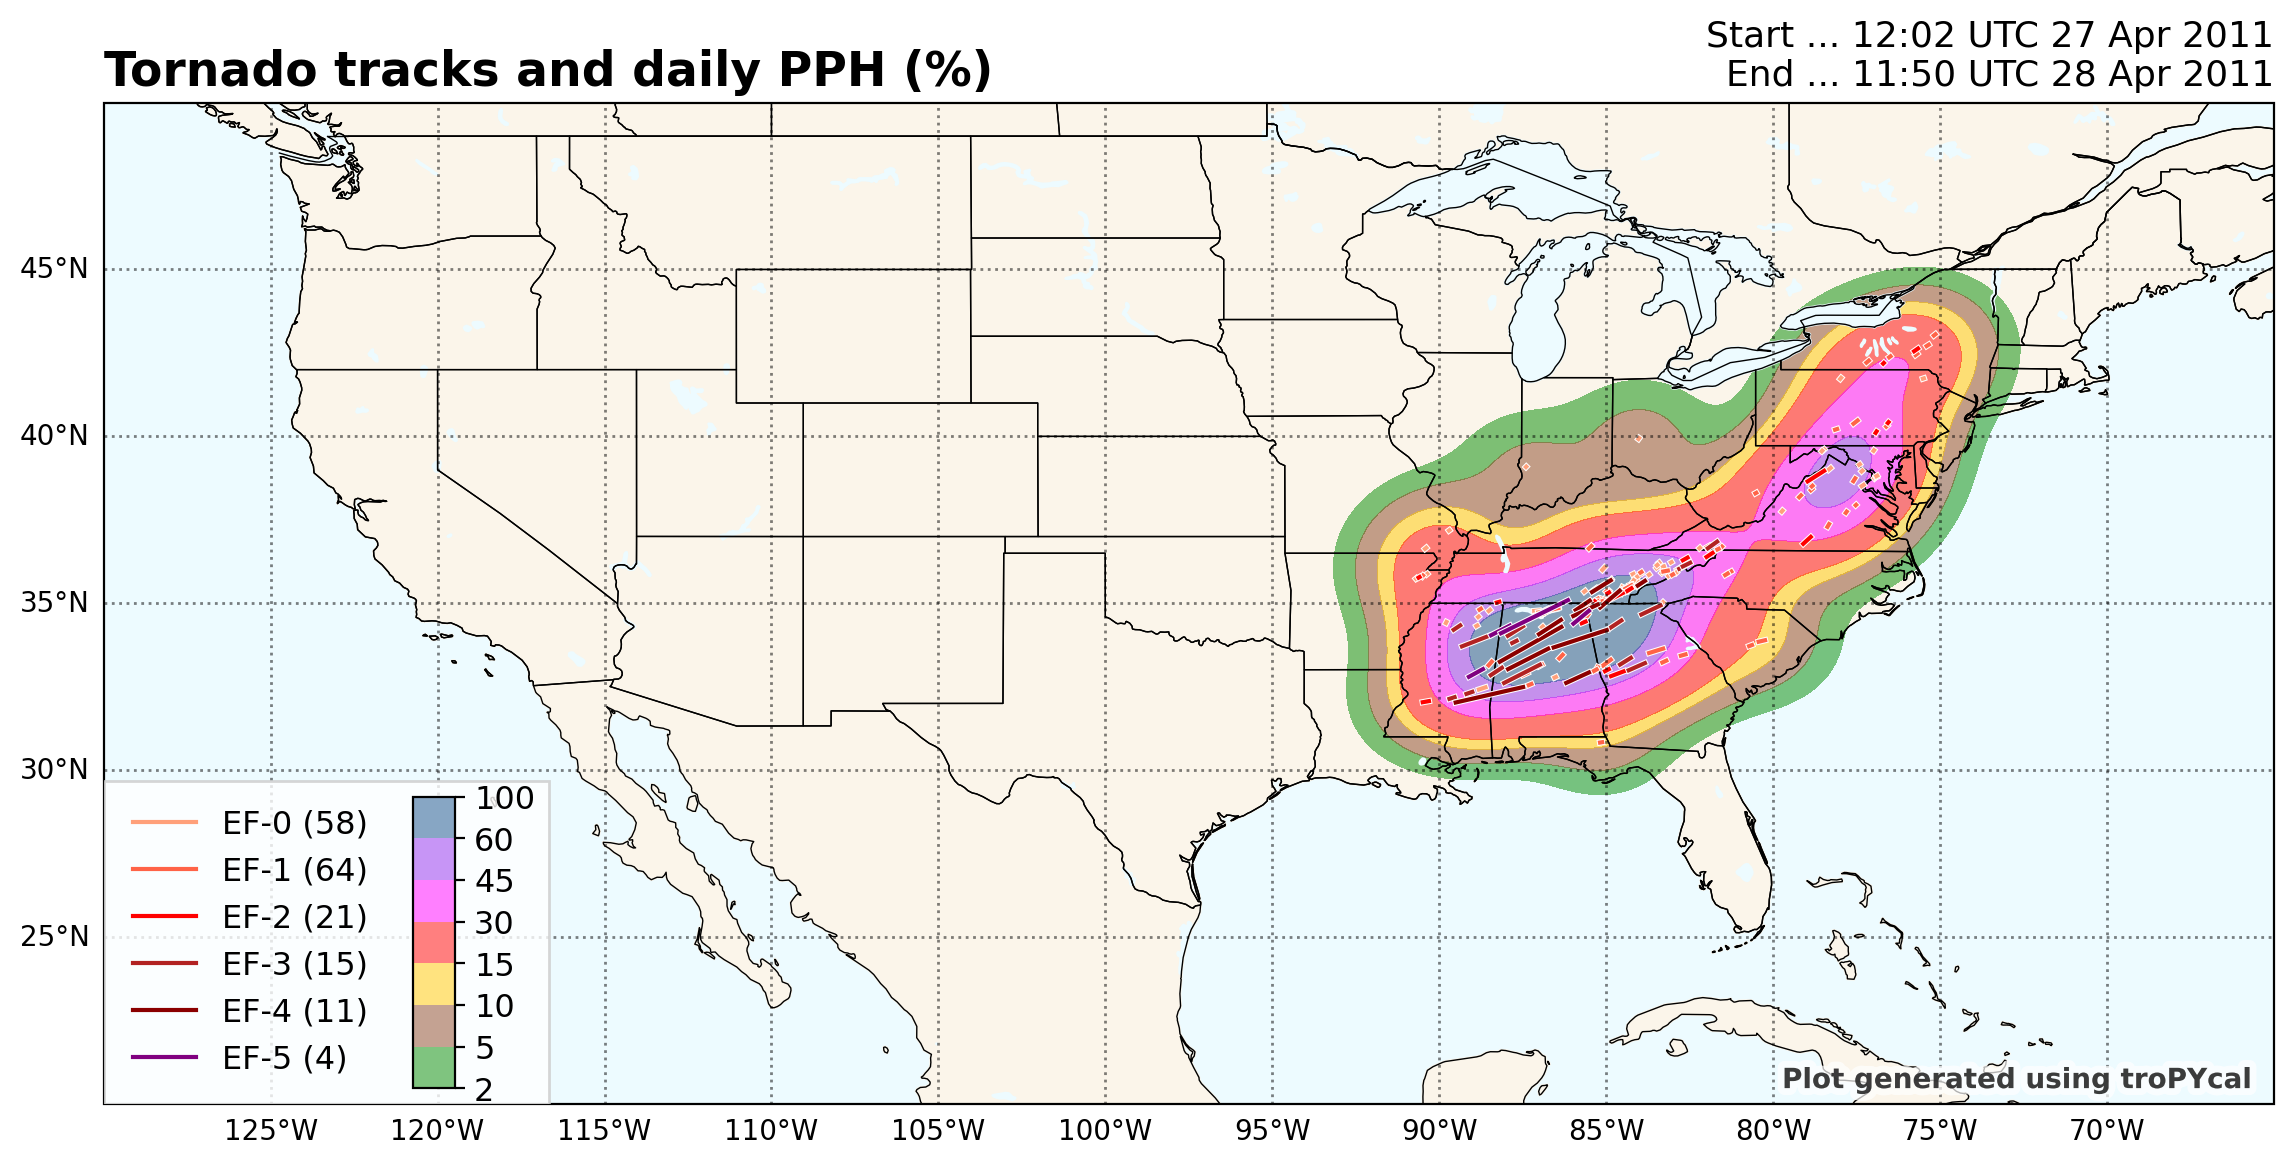

In [3]:
tor_ax,domain,leg_tor = tor_data.plot_tors(dt.datetime(2011,4,27),plotPPH=True,return_ax=True)
tor_ax

## Usando la base de datos de trayectorias con TrackDataset
TrackDataset nos permite obtener la base de datos de las trayectorias de zonas específicas, como se muestra a continuación para la cuenca HURDAT2 del atlantico norte.


In [4]:
hurdat_atl = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.74 seconds)


Esta instancia de 'storm' nos presenta diversos métodos para recuperar los datos de forma variada. Los siguientes ejemplos mostraran como recuperarlos de tres formas diferentes.

Ahora se le deberá asignar un valor de tornado desde la base de la SPC previamente descargada a cada ciclon tropical que haya producido un tornado, y para esto usaremos el método 'assign:storm_tornadoes()' de TrackDataset. El parametro principal de esto es 'dist_thresh', que controla la distancia desde el centro del ciclon tropical sobre la cual se atribuiran los tornados. En este ejemplo se usará una marca de 750 km como límite.

Debido a que el código iterará sobre cada tormenta en HURDAT2 para asignar los tornados con los ciclones tropicales que los produjeron, este código tomará algo más de tiempo en ejecutarse.

In [5]:
hurdat_atl.assign_storm_tornadoes(dist_thresh=750)

--> Starting to read in tornado track data
--> Completed reading in tornado data for 1950-2022 (6.11 seconds)
--> Starting to assign tornadoes to storms
--> Completed assigning tornadoes to storm (258.21 seconds)


Una vez que el código terminó de ejecutarse, se pueden observar y analizar las relaciones establecidas utilizando el método 'plot_TCtors_rotated()', que rota los ciclones tropicales en un marco relativo del movimiento de la tormenta. La mayoría de los tornados relacionados con ciclones tropicales ocurren e el cuadrante superior derecho, lo que se puede observar al graficar los datos.

<AxesSubplot:title={'center':'Composite motion-relative tornadoes\nMin threshold: EF-0 | n=242 storms'}, xlabel='Left/Right of Storm Heading (km)', ylabel='Behind/Ahead of Storm Heading (km)'>

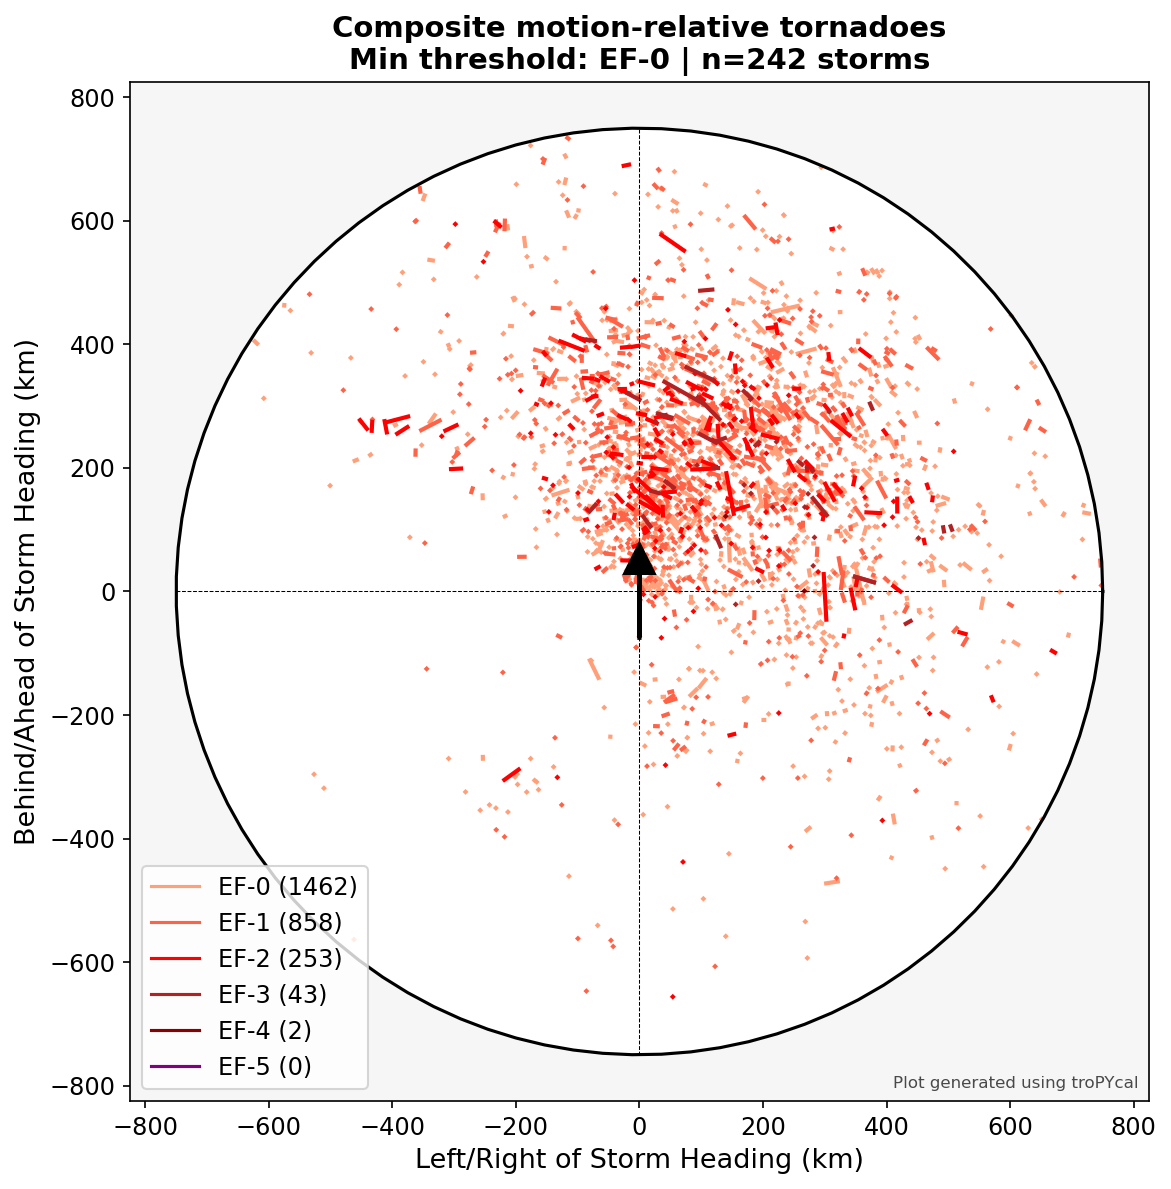

In [6]:
hurdat_atl.plot_TCtors_rotated('all')

También podemos volver a hacer el gráfico con un subconjunto de ciclones tropicales, dados sus identificadores, o una tupla para la tormenta. Para el siguiente ejemplo, usemos los cuatro huracanes que tocaron tierra en Florida durante el 2004

<AxesSubplot:title={'center':'Composite motion-relative tornadoes\nMin threshold: EF-0 | n=4 storms'}, xlabel='Left/Right of Storm Heading (km)', ylabel='Behind/Ahead of Storm Heading (km)'>

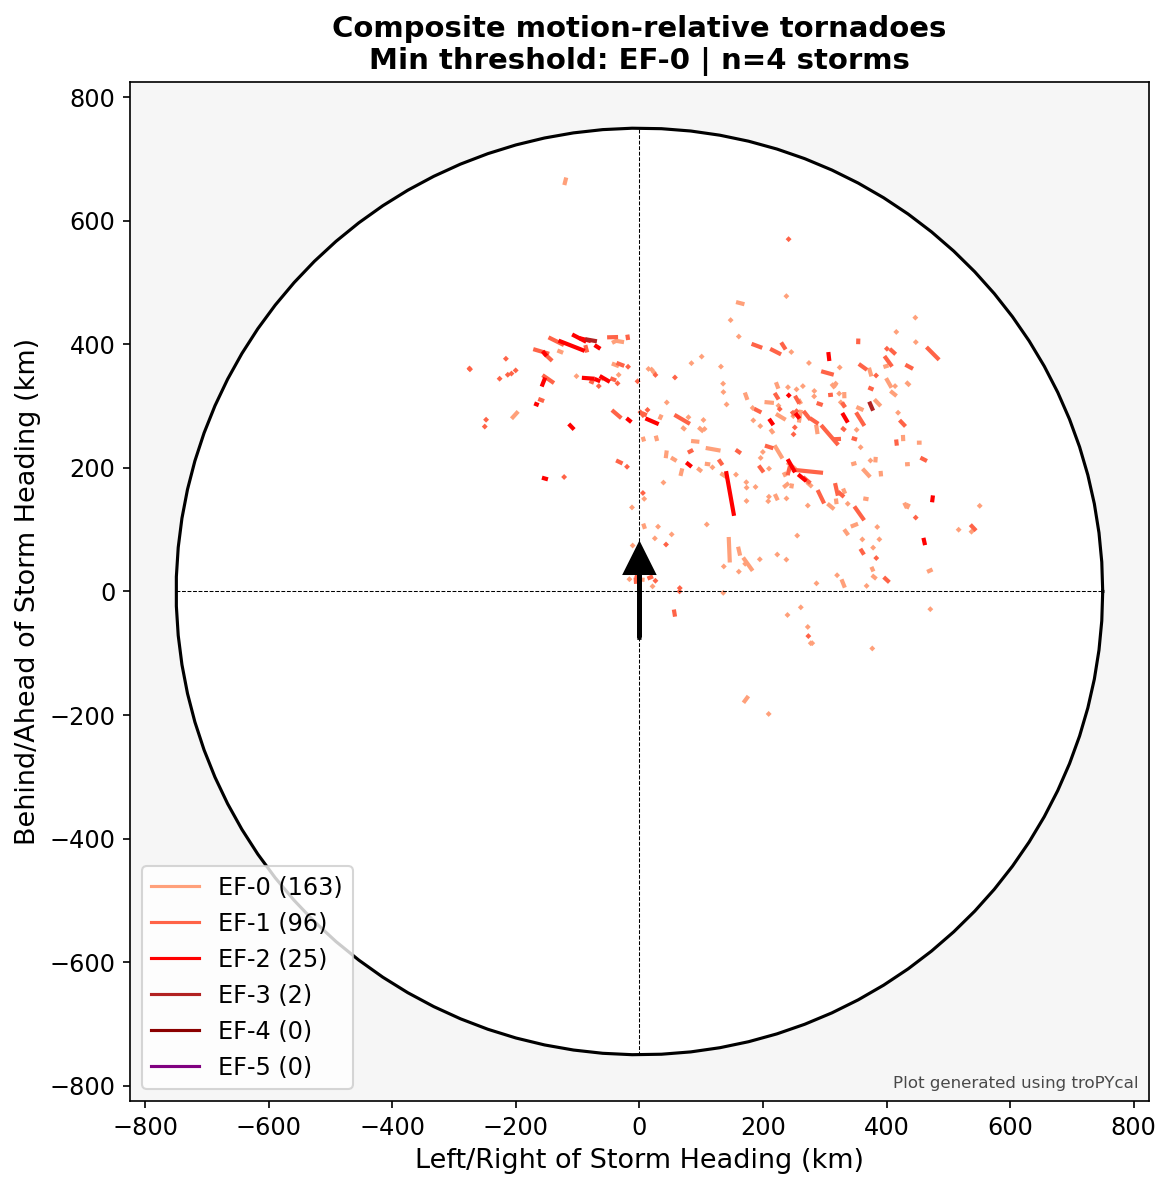

In [7]:
hurdat_atl.plot_TCtors_rotated(storms=[('charley',2004),('frances',2004),('ivan',2004),('jeanne',2004)])

## Usar un objeto 'Storm'

Tropical cyclone tornado analyses can also be done via a Storm object. Let's get the data for Hurricane Ivan from 2004, which produced a major tornado outbreak:

El análisis de tornados de ciclones tropicales tambien se puede hacer por medio de un objeto 'Storm'. Para el siguiente ejemplo, usaremos los datos del huracán Ivan ocurrido durante el año 2004, que produjo una gran brote de tornados.

Si se recuperan los datos de un objeto 'Storm' sin ejecutar previamente 'TrackDataset.assign_storm_tornadores()', se requerirá que se descargue nuevamente la base de datos de tornados para cada nueva instancia de cada objeto 'Storm'. Se recomienda ejecutar la estrategia antes mencionada previamente al análisis del objeto Storm.

In [8]:
storm = hurdat_atl.get_storm(('ivan',2004))

Ahora grafiquemos todas las trayectorias de tornados asociados al huracán Ivan.

<GeoAxesSubplot:title={'left':'Hurricane IVAN\nTornado tracks and daily PPH (%)','right':'02 Sep 2004 – 24 Sep 2004\n145 kt • 910 hPa • 70.4 ACE'}>

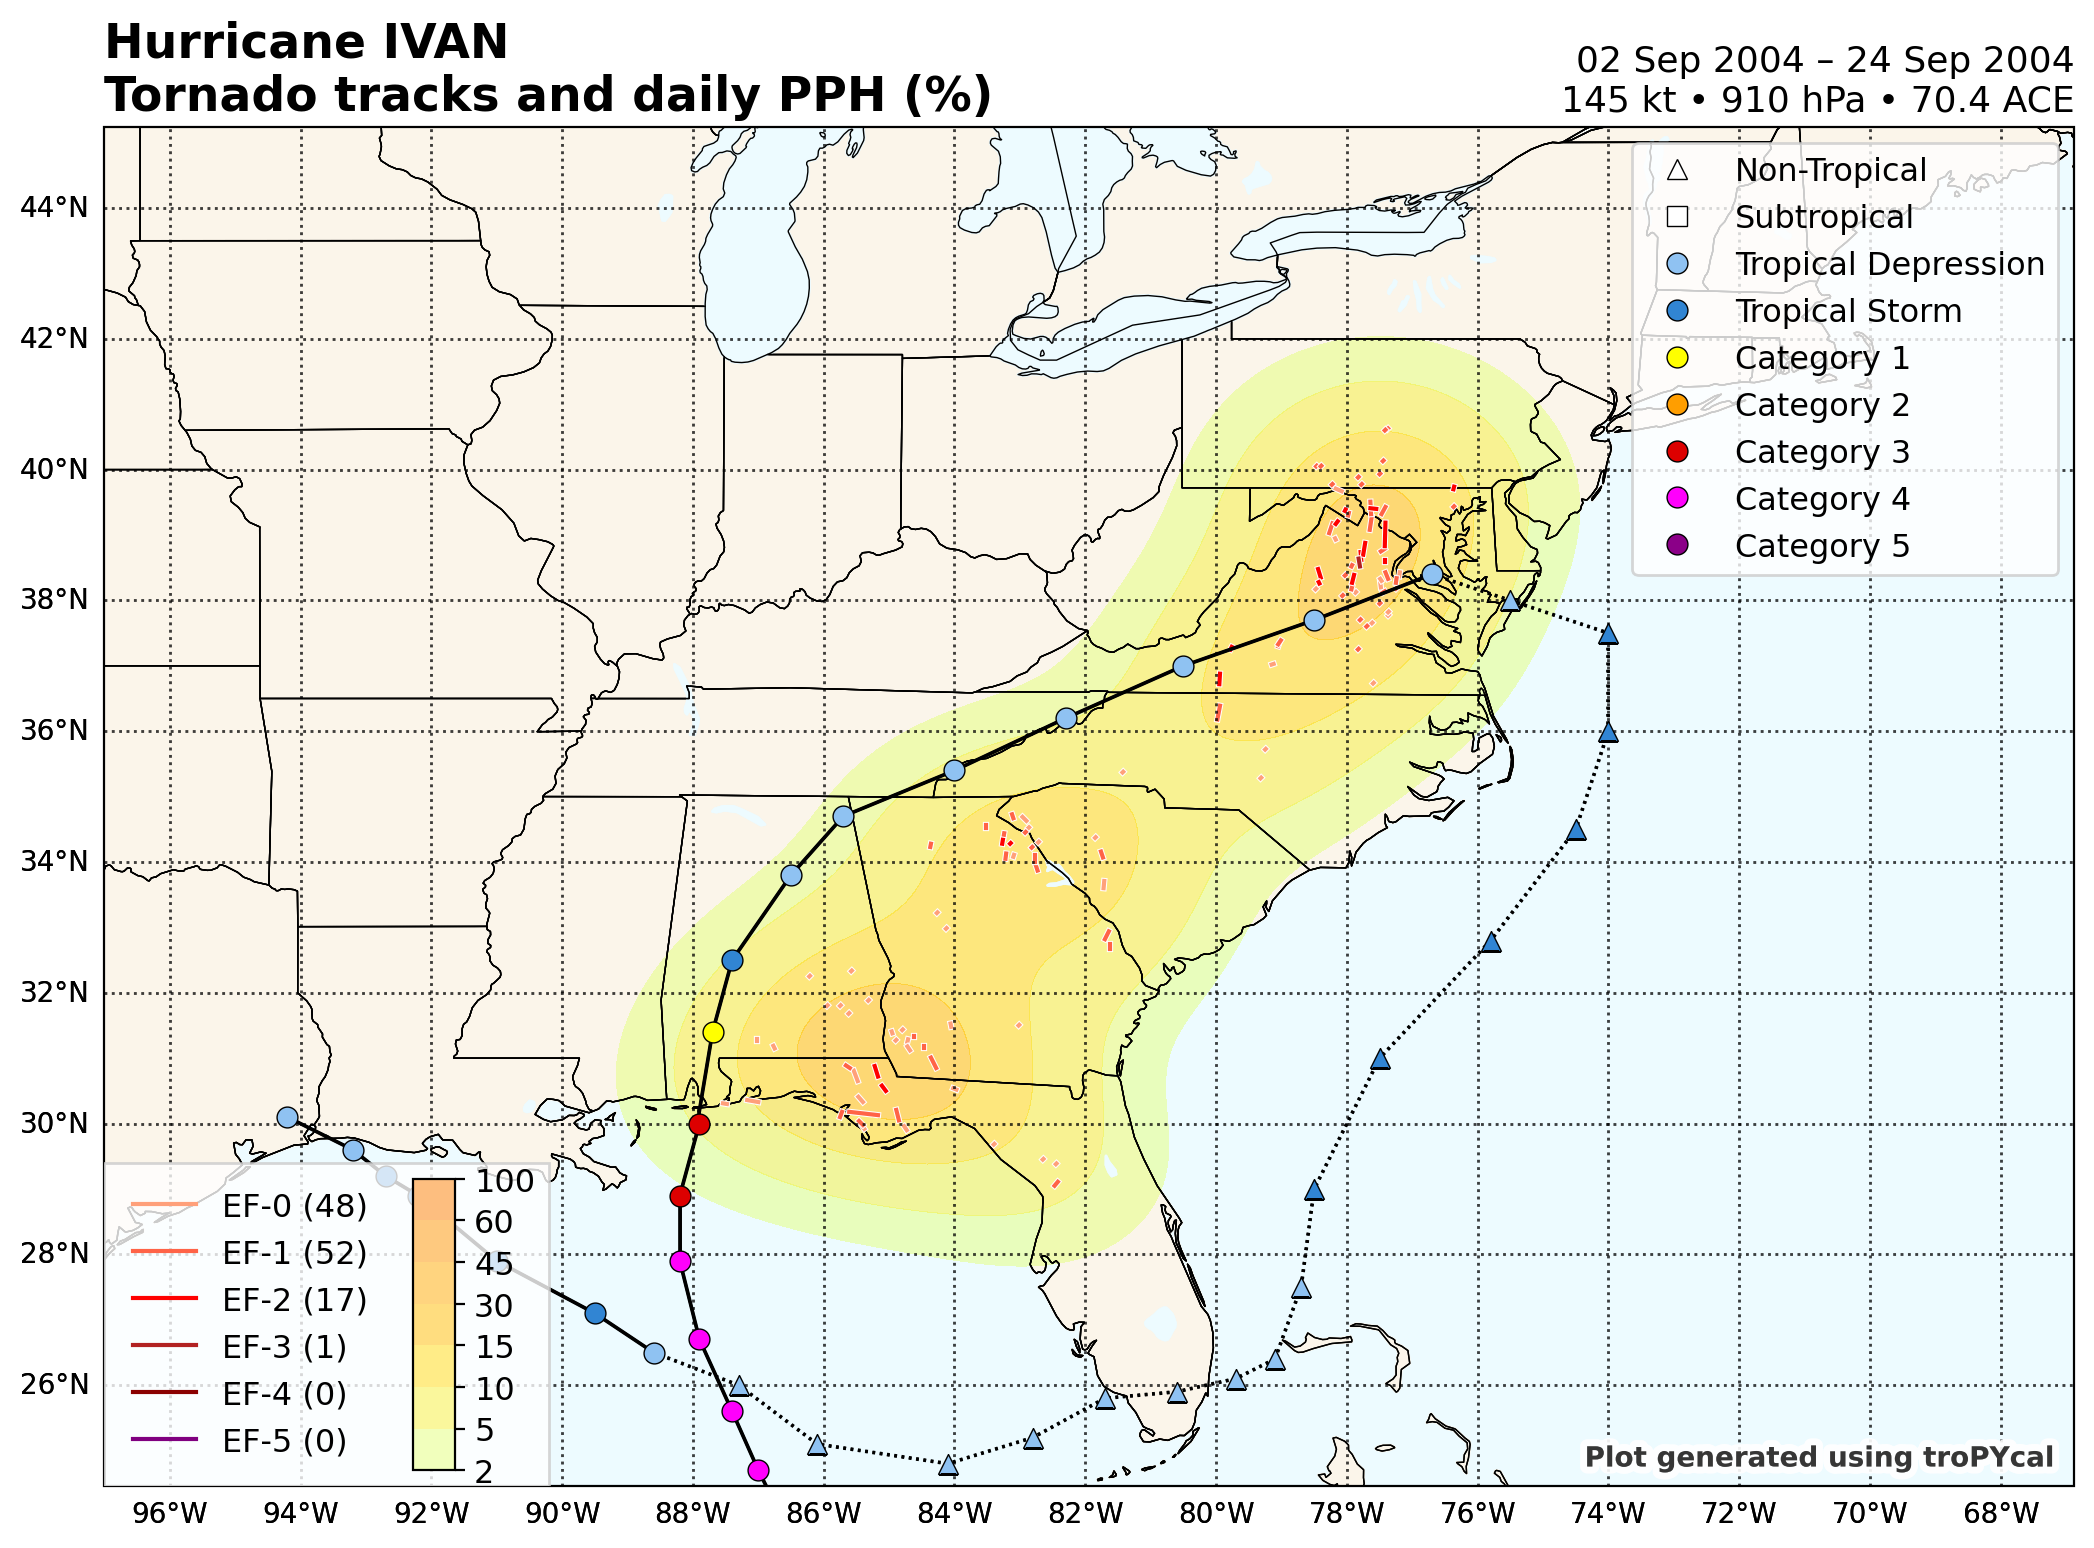

In [9]:
storm.plot_tors(plotPPH=True)

Tambien podemos hacer una gráfica de los tornados y sus coordenadas relativas al movimiento de la tormenta.

<AxesSubplot:title={'center':'IVAN 2004 tornadoes relative to heading'}, xlabel='Left/Right of Storm Heading (km)', ylabel='Behind/Ahead of Storm Heading (km)'>

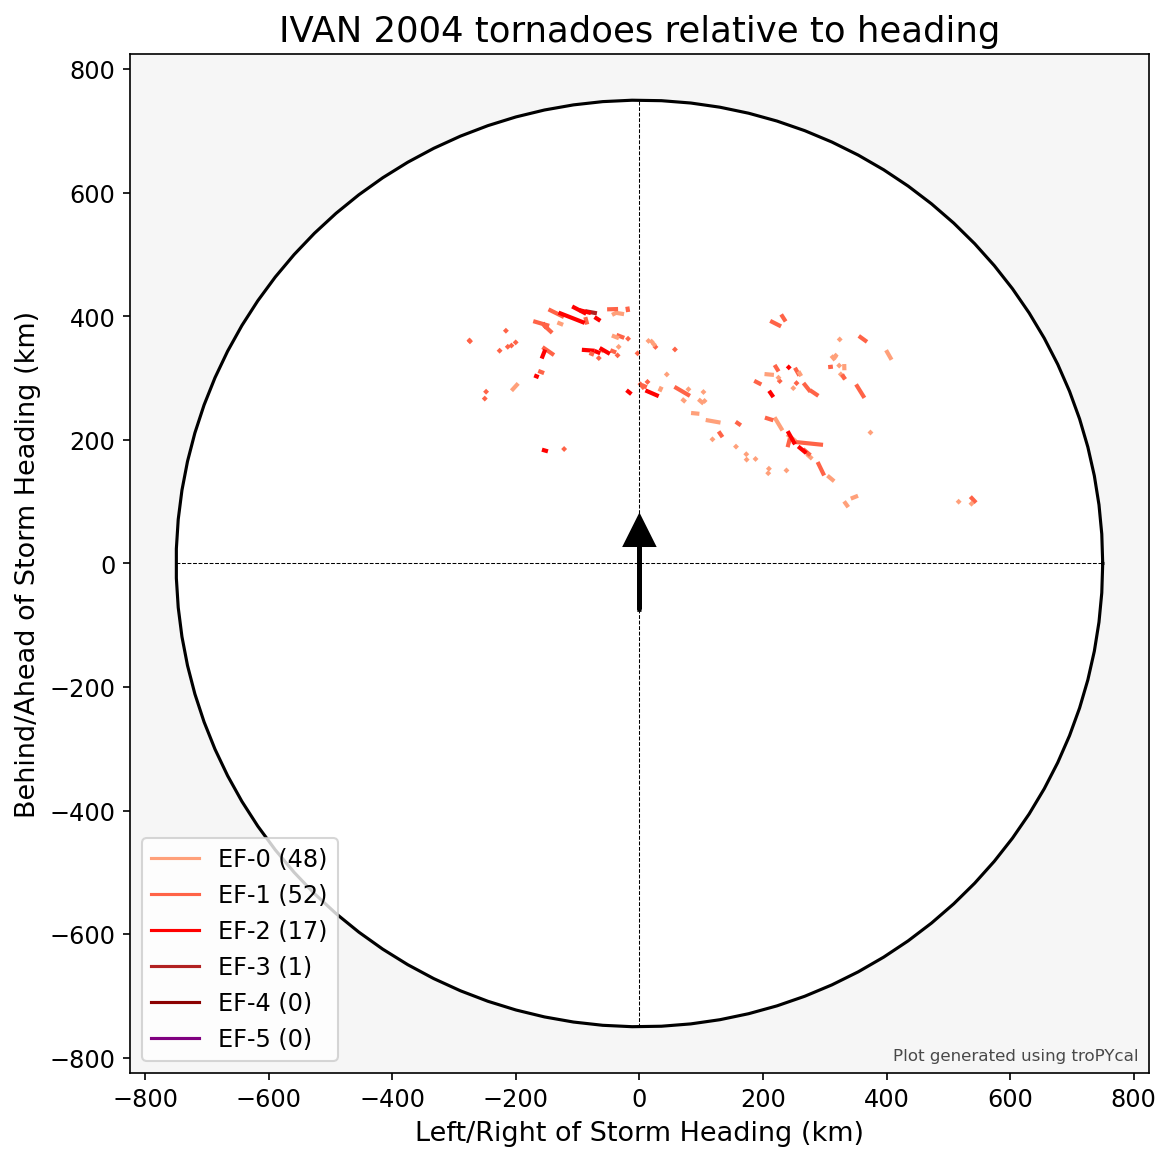

In [10]:
storm.plot_TCtors_rotated()